In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine as cos_dist
import re

## Task 1 - Similarity of texts

In [2]:
# Read text, make a lower case and split text to sentences by '\n'
text = open('sentences.txt', 'r')
sentences = text.read().lower().split('\n')[:-1] # cut the last line with ''

In [3]:
# Split sentences to words
for i in range(len(sentences)):
    sentences[i] =[x for x in re.split('[^a-z]', sentences[i]) if x]


In [4]:
# Unique words from all sentences
all_words = set([g for i in sentences for g in i])

In [5]:
# Dictionary with unique words
words = dict(zip(list(range(len(all_words))),all_words))

In [6]:
# Matrix with zeros
word_counts = np.zeros((len(sentences),len(all_words)))

In [7]:

for i in range(len(sentences)):
    for j in words.keys():
        word_counts[i][j] = sentences[i].count(words[j])

In [8]:
dist = {}
for i in range(1,len(word_counts)):
    dist[i] = cos_dist(word_counts[0],word_counts[i])

In [9]:
with open('submission-1.txt', 'w') as f:
    for item in sorted(dist.values())[:2]:
        f.write("%s " % item)

## Task 2 - Approximation of function

In [10]:
# Define a function
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [12]:
X = np.arange(1,15,0.1)

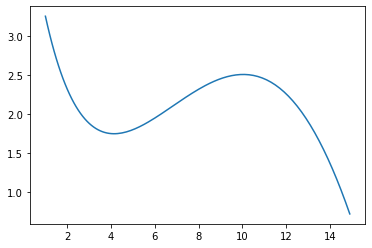

In [13]:
plt.plot(X,f(X))
plt.show()

In [39]:
# Using a first order polynomial,
# appriximate the function f(x) with two points
n = 1
x = np.array([1,15])
M = np.array([x**i for i in range(0,n+1)]).T
b = np.array(f(x))
P = np.linalg.solve(M,b)

The resulting coefficients of polynomial: 3.43914511139233 -0.18692824612091097


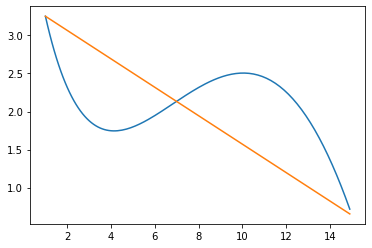

In [40]:
print('The resulting coefficients of polynomial:',*P)
plt.plot(X,f(X))
plt.plot(X,P[0]*X**0+P[1]*X**1)
plt.show()

In [31]:
# Using a second order polynomial,
# appriximate the function f(x) with three points
n = 2
x = np.array([1,8,15])
M = np.array([x**i for i in range(0,n+1)]).T
b = np.array(f(x))
P = np.linalg.solve(M, b)

The resulting coefficients of polynomial: 3.3251294940571725 -0.06531158763007616 -0.007601041155677175


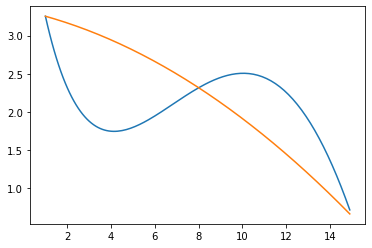

In [32]:
print('The resulting coefficients of polynomial:',*P)
plt.plot(X,f(X))
plt.plot(X,P[0]*X**0+P[1]*X**1+P[2]*X**2)
plt.show()

In [35]:
# Using a third order polynomial,
# appriximate the function f(x) with four points
n=3
x = np.array([1,4,10,15])
M = np.array([x**i for i in range(0,n+1)]).T
b = np.array(f(x))
P = np.linalg.solve(M, b)

The resulting coefficients of polynomial: 4.362641535118072 -1.2955258656948434 0.1933368470215116 -0.008235651173320554


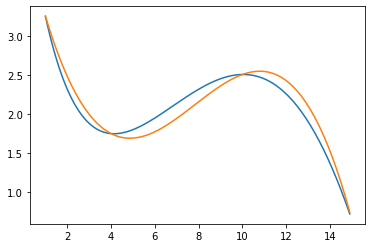

In [36]:
print('The resulting coefficients of polynomial:',*P)
plt.plot(X,f(X))
plt.plot(X,P[0]+X*P[1]+P[2]*X**2+P[3]*X**3)
plt.show()

In [250]:
with open('submission-2.txt', 'w') as f:
    for item in P:
        f.write("%s " % item)